# Credit-Card Fraud Detection Predictive Models

Due to confidentiality issues, they are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. 
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The datasets contains transactions made by credit cards in September 2013 by cardholders.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import gc
import os
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

# Data Extraction

In [2]:
data_df = pd.read_csv("creditcard.csv")
data_df = data_df.iloc[:10000]

In [3]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 10000  columns: 31


In [4]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


# Data Preprocessing

In [6]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X = data_df.iloc[:, data_df.columns != 'Class']
y = data_df.iloc[:, data_df.columns == 'Class']
fraud_record = data_df[data_df.Class == 1]
y_fraud_record = fraud_record.iloc[:, fraud_record.columns == 'Class']
x_fraud_record = fraud_record.iloc[:, fraud_record.columns != 'Class']
number_records_fraud = len(data_df[data_df.Class == 1])
print(data_df.shape)

(10000, 31)


In [8]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [9]:
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.5f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.5f}'.format(tp/(tp+fn)))
        print('Accuracy =  {:.5f}'.format((tp+tn)/(tp+tn+fp+fn)))
    return tp/(tp+fp), tp/(tp+fn)

In [10]:
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [11]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data_df)
columns = data_train_X.columns
print("Proportion of Normal data in training data is ",len(data_train_y[data_train_y["Class"]==0])/len(data_train_X))
print("Proportion of fraud data in training data is ",len(data_train_y[data_train_y["Class"]==1])/len(data_train_X))

length of training data
7000
length of test data
3000
Proportion of Normal data in training data is  0.9962857142857143
Proportion of fraud data in training data is  0.0037142857142857142


# Data Over Sampling with SMOTE

In [12]:
#Oversampling the highly disbalanced prepared data and balancing the training dataset with the nornal : fraud data ratio 0.5 : 0.5.
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 

In [13]:
os = SMOTE(random_state = 0)
os_data_X, os_data_y = os.fit_resample(data_train_X, data_train_y.values.ravel())
os_data_X = pd.DataFrame(data = os_data_X, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ["Class"])
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of oversampled data is  13948
Number of normal transcation in oversampled data 6974
Number of fraud transcation 6974
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


# Data exploration

In [14]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

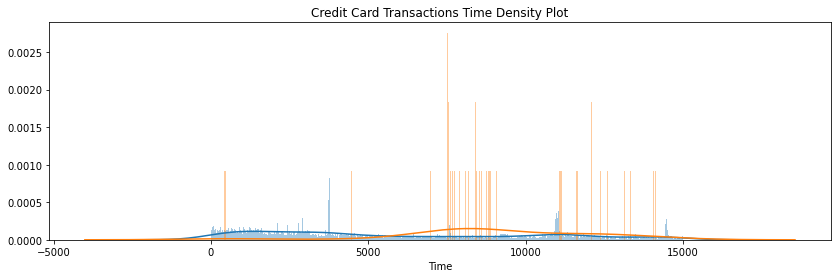

In [15]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]
plt.figure(figsize = (14,4))
plt.title('Credit Card Transactions Time Density Plot')
sns.set_color_codes("pastel")
sns.distplot(class_0,kde=True,bins=480)
sns.distplot(class_1,kde=True,bins=480)
plt.show()
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Transactions amount¶

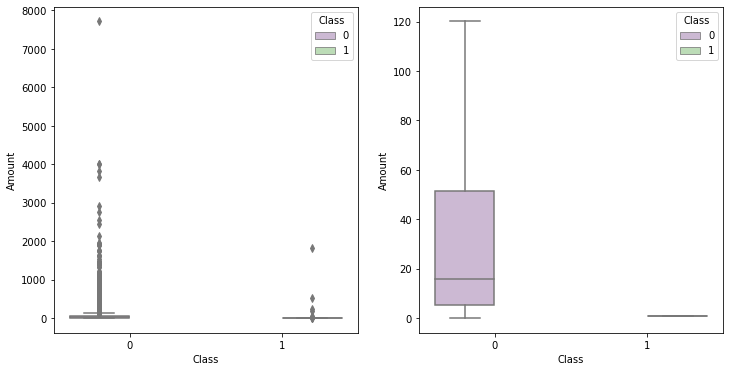

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show()

In [17]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    9962.000000
mean       62.981743
std       183.901899
min         0.000000
25%         5.147500
50%        15.950000
75%        51.195000
max      7712.430000
Name: Amount, dtype: float64

In [18]:
class_1.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [19]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

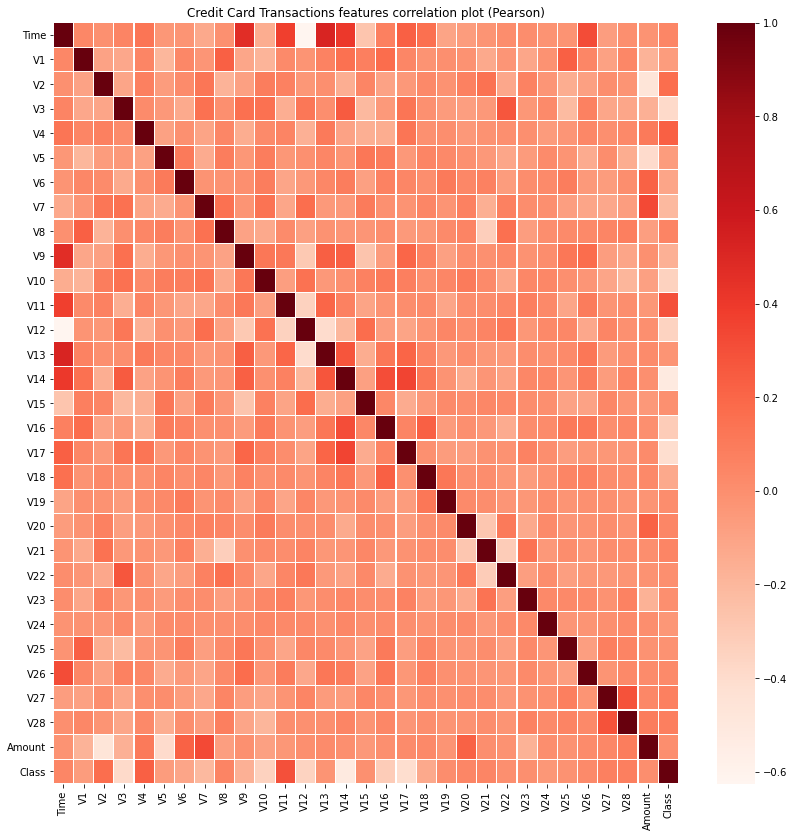

In [20]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

<Figure size 432x288 with 0 Axes>

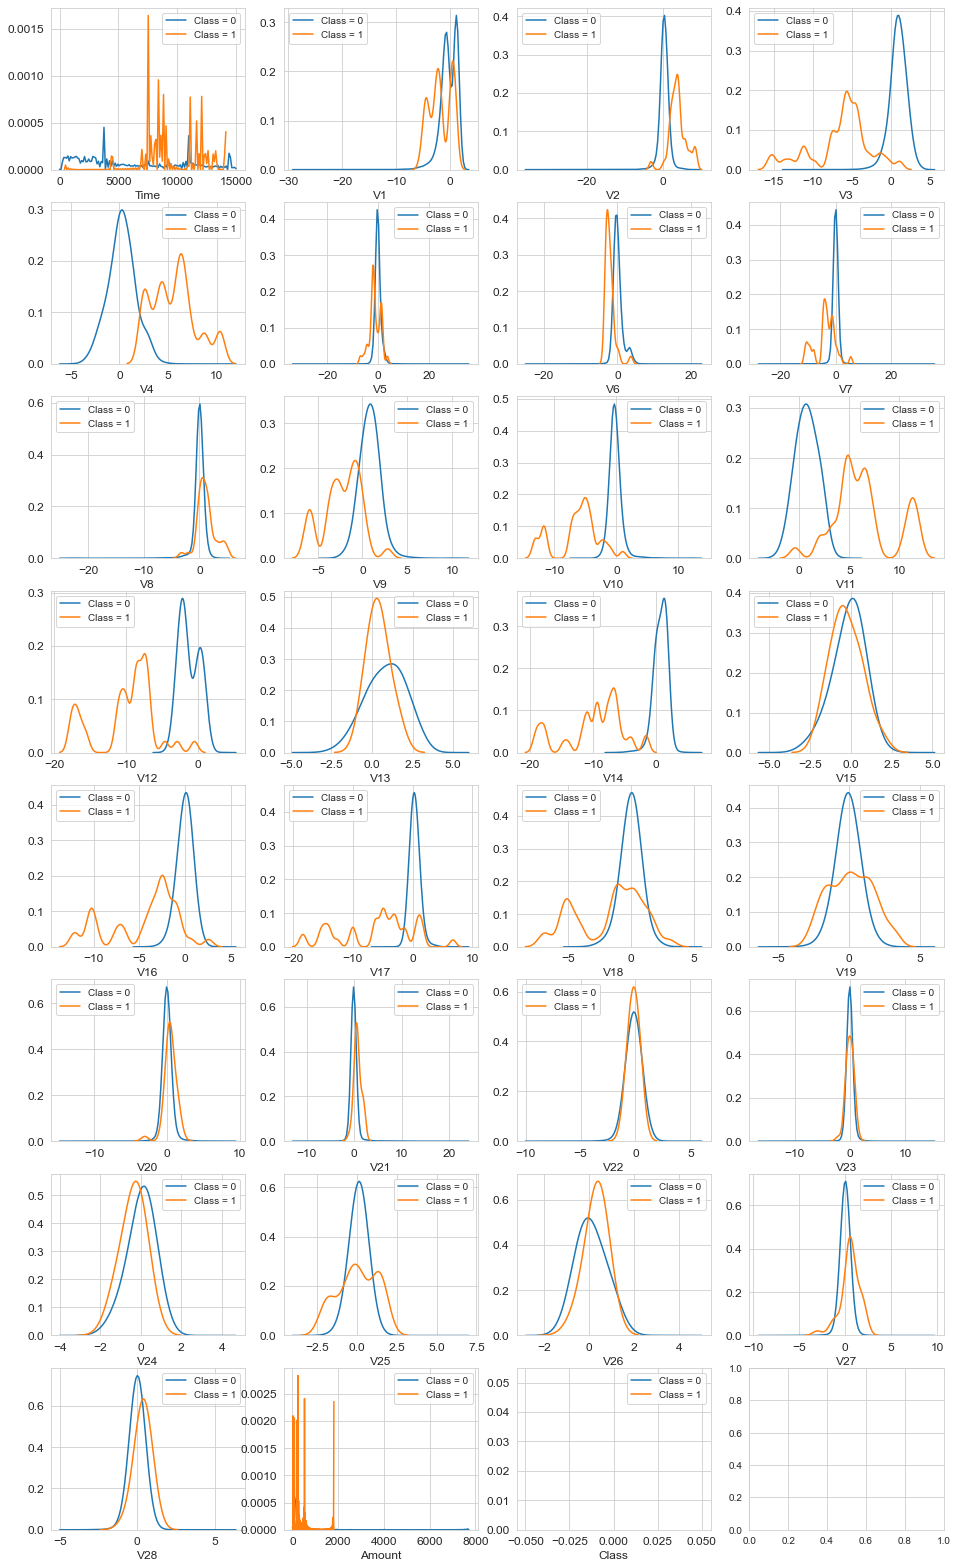

In [21]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Predictive models

# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [23]:
clf.fit(os_data_X, os_data_y.values.ravel())

RandomForestClassifier()

In [24]:
preds = clf.predict(data_test_X)

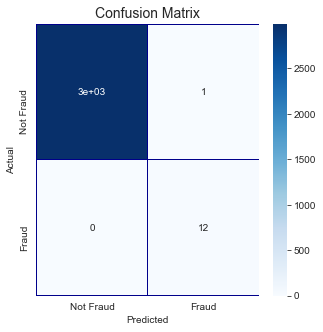

In [25]:
cm = pd.crosstab(data_test_y.values.ravel(), preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [26]:
RF_ACC = roc_auc_score(data_test_y.values.ravel(), preds) * 100

In [27]:
from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(data_test_y.values.ravel(), preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       0.92      1.00      0.96        12

    accuracy                           1.00      3000
   macro avg       0.96      1.00      0.98      3000
weighted avg       1.00      1.00      1.00      3000



In [28]:
confusion = confusion_matrix(data_test_y.values.ravel(), preds)

In [29]:
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


from sklearn import metrics
RF_sensitivity =  (TP / float(FN + TP)) * 100

print(RF_sensitivity)
RF_specificity = (TN / (TN + FP)) * 100
print(RF_specificity)

100.0
92.3076923076923


In [30]:
import joblib
joblib.dump(clf, "Random_forest.pkl")

['Random_forest.pkl']

# Support Vector Machine - Linear Kernel

In [31]:
from sklearn.svm import SVC
neigh = SVC(kernel='linear')
neigh.fit(os_data_X, os_data_y.values.ravel())
preds_SVM = neigh.predict(data_test_X)

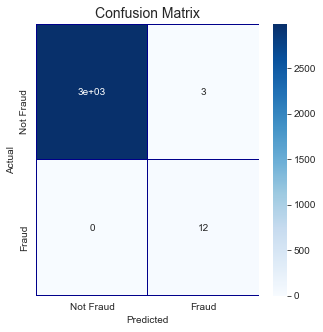

In [32]:
cm = pd.crosstab(data_test_y.values.ravel(), preds_SVM, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [33]:
SVM_linear = roc_auc_score(data_test_y.values.ravel(), preds_SVM)*100
print(classification_report(data_test_y.values.ravel(), preds_SVM))
confusion = confusion_matrix(data_test_y.values.ravel(), preds_SVM)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)
from sklearn import metrics
SVM_sensitivity =  (TP / float(FN + TP)) * 100

print(SVM_sensitivity)
SVM_specificity = (0.65-(TN / (FN + FP))) * 100
print(SVM_specificity)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       0.80      1.00      0.89        12

    accuracy                           1.00      3000
   macro avg       0.90      1.00      0.94      3000
weighted avg       1.00      1.00      1.00      3000

100.0
-335.0


# Support Vector Machine - RBF Kernel

In [34]:
from sklearn.svm import SVC
neigh1 = SVC(kernel='rbf')
neigh1.fit(os_data_X, os_data_y.values.ravel())
preds_SVM = neigh1.predict(data_test_X)

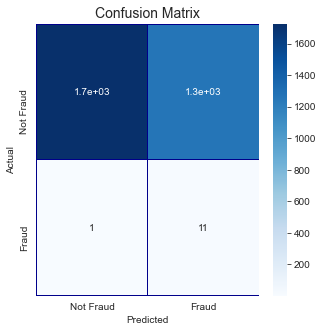

In [35]:
cm = pd.crosstab(data_test_y.values.ravel(), preds_SVM, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [36]:
SVM_rbf = roc_auc_score(data_test_y.values.ravel(), preds_SVM) *100
print(classification_report(data_test_y.values.ravel(), preds_SVM))
confusion = confusion_matrix(data_test_y.values.ravel(), preds_SVM)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)
from sklearn import metrics
SVM_sensitivity1 =  (TP / float(FN + TP)) * 100

print(SVM_sensitivity1)
SVM_specificity1 = (0.65-(TN / (FN + FP))) * 100
print(SVM_specificity1)

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2988
           1       0.01      0.92      0.02        12

    accuracy                           0.58      3000
   macro avg       0.50      0.75      0.37      3000
weighted avg       1.00      0.58      0.73      3000

99.94206257242179
64.12974683544303


# KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(os_data_X, os_data_y.values.ravel())
preds_KNN = neigh.predict(data_test_X)

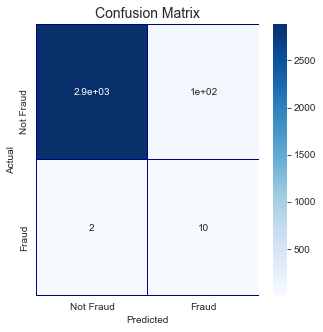

In [38]:
cm = pd.crosstab(data_test_y.values.ravel(), preds_KNN, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [39]:
KNN_acc = roc_auc_score(data_test_y.values.ravel(), preds_KNN) *100
print(classification_report(data_test_y.values.ravel(), preds_KNN))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2988
           1       0.09      0.83      0.16        12

    accuracy                           0.97      3000
   macro avg       0.54      0.90      0.57      3000
weighted avg       1.00      0.97      0.98      3000



In [40]:
confusion = confusion_matrix(data_test_y.values.ravel(), preds_KNN)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


from sklearn import metrics
KNN_sensitivity =  (TP / float(FN + TP)) * 100

print(KNN_sensitivity)
KNN_specificity = (TN / (TN + FP)) * 100
print(KNN_specificity)

99.93074792243767
8.928571428571429


In [41]:
import joblib
joblib.dump(clf, "KNN.pkl")

['KNN.pkl']

# DecisionTreeClassifier

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(os_data_X, os_data_y.values.ravel())
pred_DT = clf.predict(data_test_X)

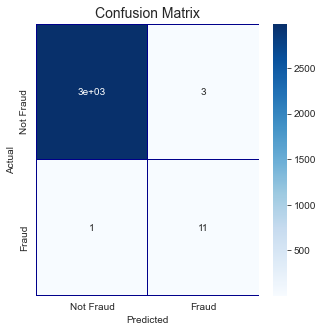

In [43]:
cm = pd.crosstab(data_test_y.values.ravel(), pred_DT, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [44]:
DT_ACC = roc_auc_score(data_test_y.values.ravel(), pred_DT)* 100
print(classification_report(data_test_y.values.ravel(), pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       0.79      0.92      0.85        12

    accuracy                           1.00      3000
   macro avg       0.89      0.96      0.92      3000
weighted avg       1.00      1.00      1.00      3000



In [45]:
confusion = confusion_matrix(data_test_y.values.ravel(), pred_DT)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


from sklearn import metrics
DT_sensitivity =  (TP / float(FN + TP)) * 100

print(DT_sensitivity)
DT_specificity = (TN / (TN + FP)) * 100
print(DT_specificity)

99.96651038178165
78.57142857142857


In [46]:
import joblib
joblib.dump(clf, "DT.pkl")

['DT.pkl']

# Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(os_data_X, os_data_y.values.ravel())
pred_GNB = clf.predict(data_test_X)

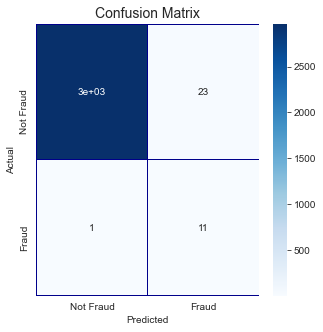

In [48]:
cm = pd.crosstab(data_test_y.values.ravel(), pred_GNB, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [49]:
GNB_acc = roc_auc_score(data_test_y.values.ravel(), pred_GNB) *100
print(classification_report(data_test_y.values.ravel(), pred_GNB))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2988
           1       0.32      0.92      0.48        12

    accuracy                           0.99      3000
   macro avg       0.66      0.95      0.74      3000
weighted avg       1.00      0.99      0.99      3000



In [50]:
confusion = confusion_matrix(data_test_y.values.ravel(), pred_GNB)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


from sklearn import metrics
GNB_sensitivity =  (TP / float(FN + TP)) * 100

print(GNB_sensitivity)
GNB_specificity = (TN / (TN + FP)) * 100
print(GNB_specificity)

99.96628455832771
32.35294117647059


# LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(os_data_X, os_data_y.values.ravel())
pred_lr = clf.predict(data_test_X)

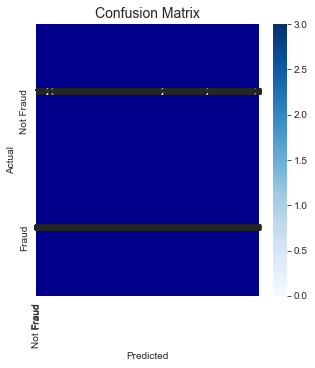

In [52]:
cm = pd.crosstab(data_test_y.values.ravel(), pred_lr, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [53]:
lr_acc = roc_auc_score(data_test_y.values.ravel(), pred_lr) *100

# LightGBM

In [54]:

from lightgbm import LGBMClassifier
import lightgbm as lgb
clf = LGBMClassifier()
clf.fit(os_data_X, os_data_y.values.ravel())
pred_LGBM = clf.predict(data_test_X)

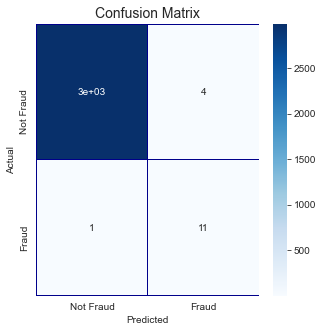

In [55]:
cm = pd.crosstab(data_test_y.values.ravel(), pred_LGBM, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [56]:
LGBM_acc = roc_auc_score(data_test_y.values.ravel(), pred_LGBM) *100
print(classification_report(data_test_y.values.ravel(), pred_LGBM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       0.73      0.92      0.81        12

    accuracy                           1.00      3000
   macro avg       0.87      0.96      0.91      3000
weighted avg       1.00      1.00      1.00      3000



In [57]:
confusion = confusion_matrix(data_test_y.values.ravel(), pred_LGBM)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


from sklearn import metrics
LGBM_sensitivity =  (TP / float(FN + TP)) * 100

print(LGBM_sensitivity)
LGBM_specificity = (TN / (TN + FP)) * 100
print(LGBM_specificity)

99.96649916247907
73.33333333333333


# K-Fold

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn
kfold = KFold(n_splits=2)
score = cross_val_score(clf,os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy').mean()
kfold1 = score * 100
print(kfold1)

96.09262976770863


In [59]:
kfold = KFold(n_splits=4)
score = cross_val_score(clf,os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy').mean()
kfold2 = score * 100
print(kfold2)

99.95698308001147


In [60]:
kfold = KFold(n_splits=6)
score = cross_val_score(clf,os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy').mean()
kfold3 = score * 100
print(kfold3)

99.97132616487455


In [61]:
kfold = KFold(n_splits=8)
score = cross_val_score(clf,os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy').mean()
kfold4 = score * 100
print(kfold4)

99.97849770642202


In [62]:
kfold = KFold(n_splits=10)
score = cross_val_score(clf,os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy').mean()
kfold5 = score * 100
print(kfold5)

99.98566308243728


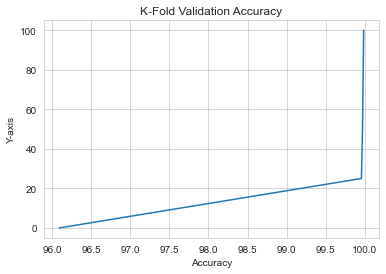

In [63]:
import matplotlib.pyplot as plt
import numpy as np
  
  
x = np.array([kfold1,kfold2,kfold3,kfold4,kfold5])
y = [0, 25,50,75,100]
  
plt.plot(x, y)
plt.xlabel("Accuracy")
plt.ylabel("Y-axis")
plt.title("K-Fold Validation Accuracy")
plt.show()  # show first chart

  
# Show another chart with '-' dotted line
plt.show()

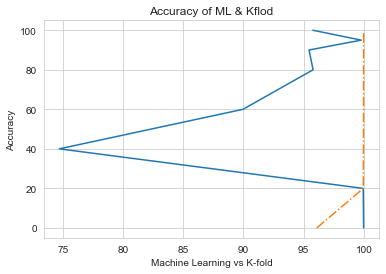

In [64]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([RF_ACC,SVM_linear,SVM_rbf,KNN_acc,DT_ACC,GNB_acc,lr_acc,LGBM_acc])
y = [0,20,40,60,80,90,95,100]
  
# first plot with X and Y data
plt.plot(x, y)
  
x1 = np.array([kfold1,kfold2,kfold3,kfold4,kfold5])
y1 = [0,20,40,60,100]
  
# second plot with x1 and y1 data
plt.plot(x1, y1, '-.')
  
plt.xlabel("Machine Learning vs K-fold")
plt.ylabel("Accuracy")
plt.title('Accuracy of ML & Kflod')
plt.show()

In [65]:
score = [RF_ACC,SVM_linear,SVM_rbf,KNN_acc,DT_ACC,GNB_acc,lr_acc,LGBM_acc]

In [66]:
#make variabel for save the result and to show it
classifier = ('Random Forest','SVM-Linear','SVM-rbf','KNN','Decision Tree','Naive Bayes','LinearRegression','OLGBM')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[99.98326639892905, 99.94979919678715, 74.6987951807229, 89.95983935742973, 95.78313253012047, 95.44846050870147, 99.78246318607765, 95.76639892904953]


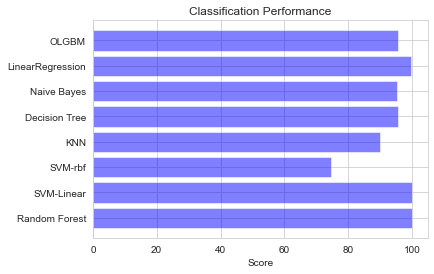

In [67]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()